In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from scipy.stats import pearsonr
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA

In [3]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [192]:
df = pd.read_csv("data/monthly_in.csv")

In [5]:
df.shape

(312, 366)

In [6]:
df.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m48,m49,m50,m51,m52,m53,m54,m55,m56,m57,m58,m59,m60,m61,m62,m63,m64,m65,m66,m67,m68,m69,m70,m71,m72,m73,m74,m75,m76,m77,m78,m79,m80,m81,m82,m83,m84,m85,m86,m87,m88,m89,m90,m91,m92,m93,m94,m95,m96,m97,m98,m99,m100,m101,m102,m103,m104,m105,m106,m107,m108,m109,m110,m111,m112,m113,m114,m115,m116,m117,m118,m119,m120,m121,m122,m123,m124,m125,m126,m127,m128,m129,m130,m131,m132,m133,m134,m135,m136,m137,m138,m139,m140,m141,m142,m143,m144,m145,m146,m147,m148,m149,m150,m151,m152,m153,m154,m155,m156,m157,m158,m159,m160,m161,m162,m163,m164,m165,m166,m167,m168,m169,m170,m171,m172,m173,m174,m175,m176,m177,m178,m179,m180,m181,m182,m183,m184,m185,m186,m187,m188,m189,m190,m191,m192,m193,m194,m195,m196,m197,m198,m199,m200,m201,m202,m203,m204,m205,m206,m207,m208,m209,m210,m211,m212,m213,m214,m215,m216,m217,m218,m219,m220,m221,m222,m223,m224,m225,m226,m227,m228,m229,m230,m231,m232,m233,m234,m235,m236,m237,m238,m239,m240,m241,m242,m243,m244,m245,m246,m247,m248,m249,m250,m251,m252,m253,m254,m255,m256,m257,m258,m259,m260,m261,m262,m263,m264,m265,m266,m267,m268,m269,m270,m271,m272,m273,m274,m275,m276,m277,m278,m279,m280,m281,m282,m283,m284,m285,m286,m287,m288,m289,m290,m291,m292,m293,m294,m295,m296,m297,m298,m299,m300,m301,m302,m303,m304,m305,m306,m307,m308,m309,m310,m311,m312,m313,m314,m315,m316,m317,m318,m319,m320,m321,m322,m323,m324,m325,m326,m327,m328,m329,m330,m331,m332,m333,m334,m335,m336,m337,m338,m339,m340,m341,m342,m343,m344,m345,m346,m347,m348,m349,m350,m351,m352,m353,m354,m355,m356,m357,m358,m359,m360,m361,m362,m363,m364,m365,m366
0,163.0000,163.00,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,228.0,228.0,228.0,228.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,67.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,307.0,307.0,307.0,307.0,307.0,307.0,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0
1,1979.0000,1979.00,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1986.0,1986.0,1986.0,1986.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,

In [193]:
monthly_index = pd.DataFrame(pd.date_range(start='1980-01-01', periods=312, freq='M'),columns=['date'])

In [194]:
df = pd.concat([monthly_index,df],axis=1)

In [195]:
df

,date,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m48,m49,m50,m51,m52,m53,m54,m55,m56,m57,m58,m59,m60,m61,m62,m63,m64,m65,m66,m67,m68,m69,m70,m71,m72,m73,m74,m75,m76,m77,m78,m79,m80,m81,m82,m83,m84,m85,m86,m87,m88,m89,m90,m91,m92,m93,m94,m95,m96,m97,m98,m99,m100,m101,m102,m103,m104,m105,m106,m107,m108,m109,m110,m111,m112,m113,m114,m115,m116,m117,m118,m119,m120,m121,m122,m123,m124,m125,m126,m127,m128,m129,m130,m131,m132,m133,m134,m135,m136,m137,m138,m139,m140,m141,m142,m143,m144,m145,m146,m147,m148,m149,m150,m151,m152,m153,m154,m155,m156,m157,m158,m159,m160,m161,m162,m163,m164,m165,m166,m167,m168,m169,m170,m171,m172,m173,m174,m175,m176,m177,m178,m179,m180,m181,m182,m183,m184,m185,m186,m187,m188,m189,m190,m191,m192,m193,m194,m195,m196,m197,m198,m199,m200,m201,m202,m203,m204,m205,m206,m207,m208,m209,m210,m211,m212,m213,m214,m215,m216,m217,m218,m219,m220,m221,m222,m223,m224,m225,m226,m227,m228,m229,m230,m231,m232,m233,m234,m235,m236,m237,m238,m239,m240,m241,m242,m243,m244,m245,m246,m247,m248,m249,m250,m251,m252,m253,m254,m255,m256,m257,m258,m259,m260,m261,m262,m263,m264,m265,m266,m267,m268,m269,m270,m271,m272,m273,m274,m275,m276,m277,m278,m279,m280,m281,m282,m283,m284,m285,m286,m287,m288,m289,m290,m291,m292,m293,m294,m295,m296,m297,m298,m299,m300,m301,m302,m303,m304,m305,m306,m307,m308,m309,m310,m311,m312,m313,m314,m315,m316,m317,m318,m319,m320,m321,m322,m323,m324,m325,m326,m327,m328,m329,m330,m331,m332,m333,m334,m335,m336,m337,m338,m339,m340,m341,m342,m343,m344,m345,m346,m347,m348,m349,m350,m351,m352,m353,m354,m355,m356,m357,m358,m359,m360,m361,m362,m363,m364,m365,m366
0,1980-01-31,163.0000,163.00,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,228.0,228.0,228.0,228.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,67.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,307.0,307.0,307.0,307.0,307.0,307.0,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0
1,1980-02-29,1979.0000,1979.00,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1986.0,1986.0,1986.0,1986.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1

In [196]:
# Armamos una funcion inicial para plotear resultados
def plot_results(df: pd.DataFrame,
                 date_col: str = 'date',
                 start_date: str = '1980-01-31',
                 end_date: str = '2005-12-31',
                 historical_col: str = 'm1',
                 forecast_col: list = None,
                 model_name: str = None) -> None:
    # Filtramos por fecha
    df_filt = df[(df[date_col] >= start_date) & (df[date_col] <= end_date)]

    # Creamos el grafico
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.plot(df_filt[date_col], df_filt[historical_col], label='Historical')

    # Si tenemos un forecast, lo graficamos
    if forecast_col:
        for col in forecast_col:
            ax.plot(df_filt[date_col], df_filt[col], label=f'Forecast - {col}')

    if model_name:
        ax.set_title(f'Historical and forecast {historical_col} - model {model_name}')
    else:
        ax.set_title(f'Historical serie {historical_col}')

    ax.legend()
    ax.tick_params(labelrotation=90)
    plt.show()

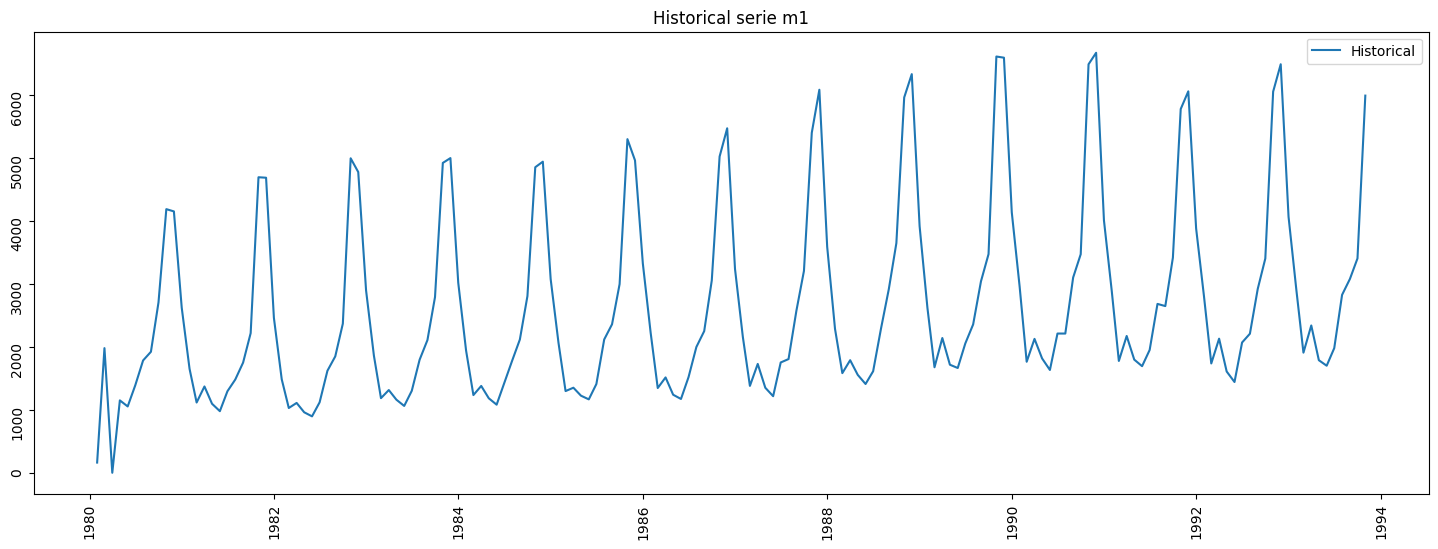

In [197]:
plot_results(df, date_col='date', start_date='1980-01-31', end_date='2005-12-31', historical_col='m1')

## Analisis de tendencia y estacionalidad

#### Análisis simple

#### Estacionalidad

In [198]:
df['month'] = df['date'].dt.month
df.head()

,date,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m48,m49,m50,m51,m52,m53,m54,m55,m56,m57,m58,m59,m60,m61,m62,m63,m64,m65,m66,m67,m68,m69,m70,m71,m72,m73,m74,m75,m76,m77,m78,m79,m80,m81,m82,m83,m84,m85,m86,m87,m88,m89,m90,m91,m92,m93,m94,m95,m96,m97,m98,m99,m100,m101,m102,m103,m104,m105,m106,m107,m108,m109,m110,m111,m112,m113,m114,m115,m116,m117,m118,m119,m120,m121,m122,m123,m124,m125,m126,m127,m128,m129,m130,m131,m132,m133,m134,m135,m136,m137,m138,m139,m140,m141,m142,m143,m144,m145,m146,m147,m148,m149,m150,m151,m152,m153,m154,m155,m156,m157,m158,m159,m160,m161,m162,m163,m164,m165,m166,m167,m168,m169,m170,m171,m172,m173,m174,m175,m176,m177,m178,m179,m180,m181,m182,m183,m184,m185,m186,m187,m188,m189,m190,m191,m192,m193,m194,m195,m196,m197,m198,m199,m200,m201,m202,m203,m204,m205,m206,m207,m208,m209,m210,m211,m212,m213,m214,m215,m216,m217,m218,m219,m220,m221,m222,m223,m224,m225,m226,m227,m228,m229,m230,m231,m232,m233,m234,m235,m236,m237,m238,m239,m240,m241,m242,m243,m244,m245,m246,m247,m248,m249,m250,m251,m252,m253,m254,m255,m256,m257,m258,m259,m260,m261,m262,m263,m264,m265,m266,m267,m268,m269,m270,m271,m272,m273,m274,m275,m276,m277,m278,m279,m280,m281,m282,m283,m284,m285,m286,m287,m288,m289,m290,m291,m292,m293,m294,m295,m296,m297,m298,m299,m300,m301,m302,m303,m304,m305,m306,m307,m308,m309,m310,m311,m312,m313,m314,m315,m316,m317,m318,m319,m320,m321,m322,m323,m324,m325,m326,m327,m328,m329,m330,m331,m332,m333,m334,m335,m336,m337,m338,m339,m340,m341,m342,m343,m344,m345,m346,m347,m348,m349,m350,m351,m352,m353,m354,m355,m356,m357,m358,m359,m360,m361,m362,m363,m364,m365,m366,month
0,1980-01-31,163.0000,163.00,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,228.0,228.0,228.0,228.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,67.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,307.0,307.0,307.0,307.0,307.0,307.0,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,1
1,1980-02-29,1979.0000,1979.00,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1986.0,1986.0,1986.0,1986.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,

In [199]:
df_month = df.drop(columns="date").groupby(['month']).mean().reset_index().sort_values(
    by='month')
df_month.head()

,month,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m48,m49,m50,m51,m52,m53,m54,m55,m56,m57,m58,m59,m60,m61,m62,m63,m64,m65,m66,m67,m68,m69,m70,m71,m72,m73,m74,m75,m76,m77,m78,m79,m80,m81,m82,m83,m84,m85,m86,m87,m88,m89,m90,m91,m92,m93,m94,m95,m96,m97,m98,m99,m100,m101,m102,m103,m104,m105,m106,m107,m108,m109,m110,m111,m112,m113,m114,m115,m116,m117,m118,m119,m120,m121,m122,m123,m124,m125,m126,m127,m128,m129,m130,m131,m132,m133,m134,m135,m136,m137,m138,m139,m140,m141,m142,m143,m144,m145,m146,m147,m148,m149,m150,m151,m152,m153,m154,m155,m156,m157,m158,m159,m160,m161,m162,m163,m164,m165,m166,m167,m168,m169,m170,m171,m172,m173,m174,m175,m176,m177,m178,m179,m180,m181,m182,m183,m184,m185,m186,m187,m188,m189,m190,m191,m192,m193,m194,m195,m196,m197,m198,m199,m200,m201,m202,m203,m204,m205,m206,m207,m208,m209,m210,m211,m212,m213,m214,m215,m216,m217,m218,m219,m220,m221,m222,m223,m224,m225,m226,m227,m228,m229,m230,m231,m232,m233,m234,m235,m236,m237,m238,m239,m240,m241,m242,m243,m244,m245,m246,m247,m248,m249,m250,m251,m252,m253,m254,m255,m256,m257,m258,m259,m260,m261,m262,m263,m264,m265,m266,m267,m268,m269,m270,m271,m272,m273,m274,m275,m276,m277,m278,m279,m280,m281,m282,m283,m284,m285,m286,m287,m288,m289,m290,m291,m292,m293,m294,m295,m296,m297,m298,m299,m300,m301,m302,m303,m304,m305,m306,m307,m308,m309,m310,m311,m312,m313,m314,m315,m316,m317,m318,m319,m320,m321,m322,m323,m324,m325,m326,m327,m328,m329,m330,m331,m332,m333,m334,m335,m336,m337,m338,m339,m340,m341,m342,m343,m344,m345,m346,m347,m348,m349,m350,m351,m352,m353,m354,m355,m356,m357,m358,m359,m360,m361,m362,m363,m364,m365,m366
0,1,2142.452486,115880.525714,82539.428571,18537.857143,26616.238095,33831.333333,20036.809524,100453.380952,21744.714286,19909.619048,23018.761905,23855.571429,136449.333333,248340.809524,7461.236000,11155.817500,6335.293000,1574.237500,47213.846154,35582.115385,5926.230769,9967.307692,6360.807692,4426.192308,5307.692308,4546.192308,6708.153846,4763.884615,4907.615385,25723.769231,5154.692308,29354.692308,9463.346154,22742.576923,14117.346154,242078.153846,22384.307692,29445.653846,2893.692308,5478.115385,3440.923077,1930.961538,3918.230769,2881.653846,4494.730769,1677.269231,1386.653846,14200.346154,2819.192308,12850.884615,6652.769231,12050.115385,5030.307692,133347.500000,12216.961538,821.538462,1266.653846,1194.230769,1409.884615,701.500000,383.807692,470.923077,557.269231,610.730769,1291.500000,3215.615385,1196.653846,11102.192308,1229.346154,4702.653846,3316.230769,45499.384615,8131.115385,2461.653846,964.923077,1715.423077,727.730769,576.384615,344.038462,466.961538,614.576923,1477.038462,980.730769,5783.269231,684.846154,2963.961538,858.038462,3169.692308,2273.076923,34005.153846,4516.769231,2888.576923,836.269231,1614.846154,817.576923,1252.653846,696.923077,761.961538,1076.884615,1034.153846,1284.038462,2559.846154,489.307692,2472.961538,758.500000,2855.423077,3533.038462,29261.423077,751.666667,8591.666667,445.000000,1365.000000,34578.333333,2111.666667,2825.000000,391.666667,331.666667,2305.000000,731.666667,54278.333333,418.333333,2598.333333,2438.333333,1305.000000,1025.000000,291.666667,665.000000,18898.333333,671.666667,28225.000000,1385.000000,3538.333333,351.666667,251.666667,998.333333,1698.333333,8445.000000,631.666667,605.000000,651.666667,711.666667,491.666667,945.000000,3985.000000,345.000000,1144.500000,22105.000000,8311.666667,3871.666667,9678.333333,11111.666667,2898.333333,451.666667,59131.666667,7465.000000,10458.333333,5218.333333,1571.666667,2225.000000,145.000000,27011.666667,3125.000000,325.000000,671.666667,585.000000,5451.666667,465.000000,305.000000,2218.333333,385.000000,345.000000,25085.000000,725.000000,29478.333333,518.333333,1951.666667,891.666667,3351.666667,1165.000000,220425.000000,299.653846,409.423077,168.923077,57.538462,216.884615,1105.192308,11001.615385,9034.461538,5978.230769,3355.

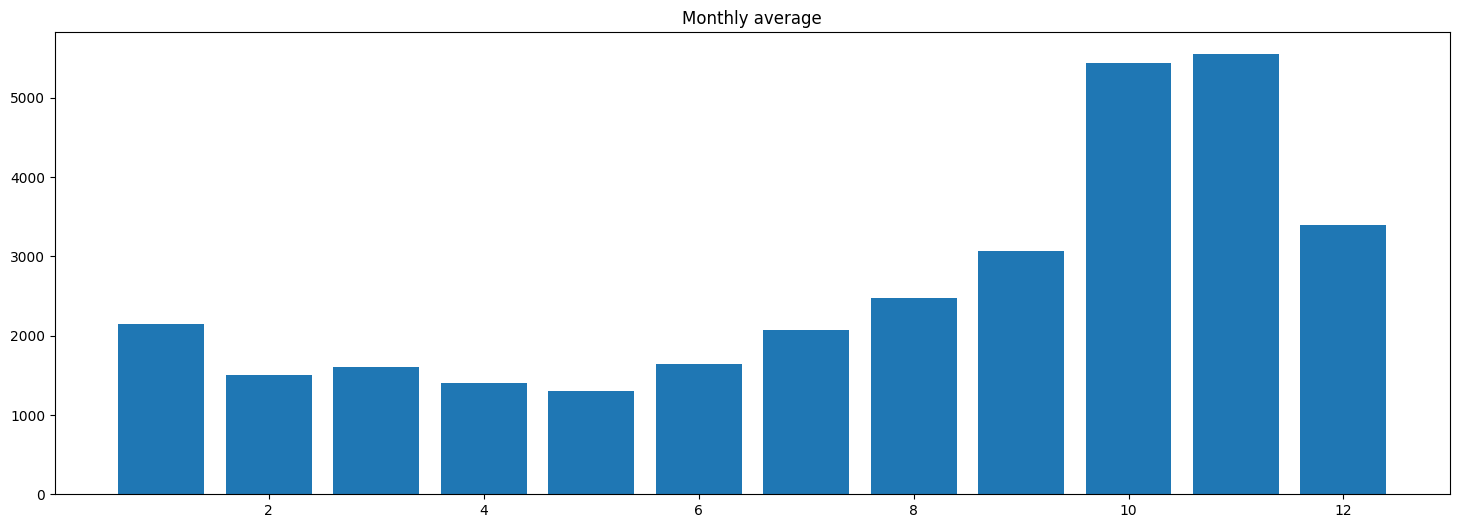

In [200]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.bar(df_month['month'], df_month['m1'])
ax.set_title(f'Monthly average')
plt.show()

#### Análisis Estadistico

#### Descomposicion de la serie de tiempo

In [201]:
df_filt= df.set_index('date')

In [202]:
def series_decompose(df: pd.DataFrame = df,
                    historical_col: str = 'm1',
                    period: int = 12):
    ts_decomposition = seasonal_decompose(df.loc[:df[historical_col].notna()[::-1].idxmax(),historical_col], period=period)
    trend_estimate = ts_decomposition.trend
    seasonal_estimate = ts_decomposition.seasonal
    residual_estimate = ts_decomposition.resid
    
     # Ploteo la serie y sus complenentes
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(20)

    # Serie original
    axes[0].plot(df.index, df[historical_col], label='Original')
    axes[0].legend(loc='upper left')
    # second plot to be for trend
    axes[1].plot(trend_estimate, label='Trend')
    axes[1].legend(loc='upper left')
    # third plot to be Seasonality component
    axes[2].plot(seasonal_estimate, label='Seasonality')
    axes[2].legend(loc='upper left')
    # last last plot to be Residual component
    axes[3].plot(residual_estimate, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()

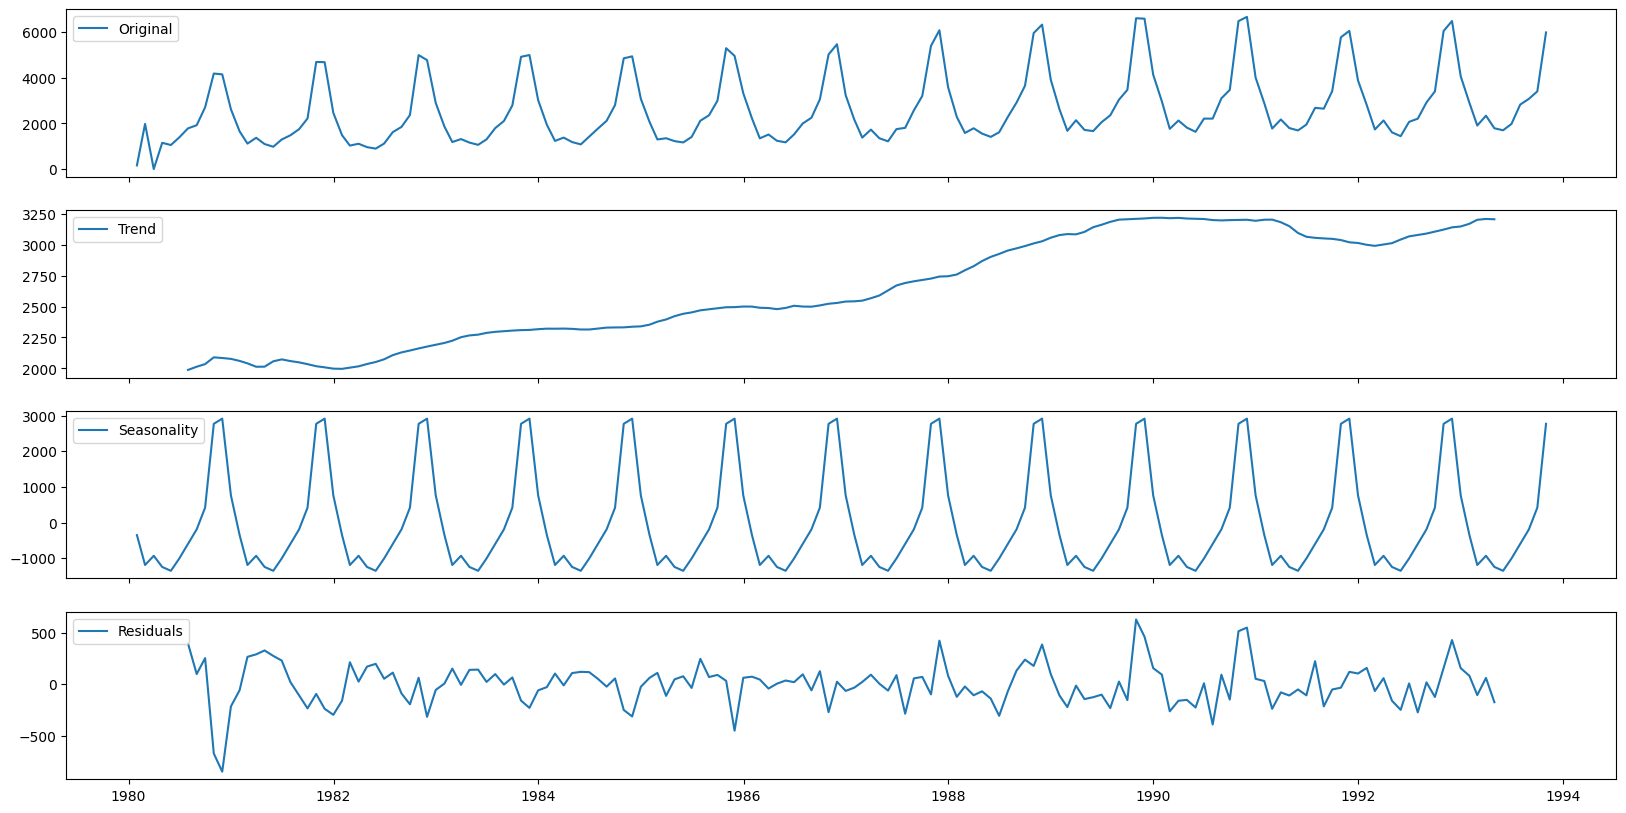

In [203]:
series_decompose(df=df_filt, historical_col='m1', period=12)

##### Tendencia
Empezamos calculando el ROT

In [204]:
def series_trend(df: pd.DataFrame = df,
                    historical_col: str = 'm1'):
    df_rot = df.copy()
    df_rot['lag_1'] = df_rot[historical_col].shift(1)
    df_rot['diff_1'] = df_rot[historical_col] - df_rot['lag_1']
    ROT = np.mean(df_rot['diff_1'])/np.mean(df_rot[historical_col])
    if ROT < 0.001:
        print(f'ROT: {ROT}. There is a trend')
    else:
        print(f'ROT: {ROT}. There is not a trend')
    

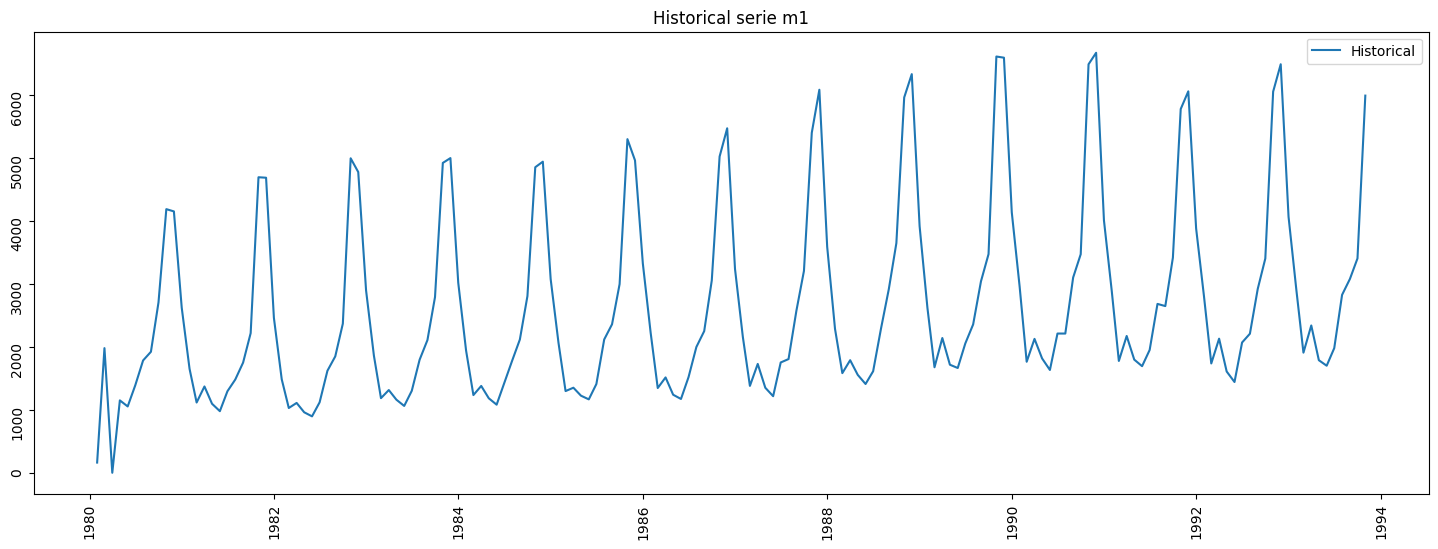

In [207]:
plot_results(df, date_col='date', start_date='1980-01-31', end_date='2005-12-31', historical_col='m1')

In [206]:
series_trend(df,'m1')

ROT: 0.013517052103210433. There is not a trend


##### Estacionalidad

In [208]:
# Ahora hacemos lo mismo con un analisis de regresion.
# Primero para los meses
df['month'] = df['date'].dt.month_name()
df = pd.concat(
                [
                    df,
                    pd.get_dummies(df['month'], prefix='month', prefix_sep='-', drop_first=True, dtype=int)
                ], axis=1)
cols = pd.get_dummies(df['month'], prefix='month', prefix_sep='-', drop_first=True).columns

In [209]:
df

,date,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20,m21,m22,m23,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33,m34,m35,m36,m37,m38,m39,m40,m41,m42,m43,m44,m45,m46,m47,m48,m49,m50,m51,m52,m53,m54,m55,m56,m57,m58,m59,m60,m61,m62,m63,m64,m65,m66,m67,m68,m69,m70,m71,m72,m73,m74,m75,m76,m77,m78,m79,m80,m81,m82,m83,m84,m85,m86,m87,m88,m89,m90,m91,m92,m93,m94,m95,m96,m97,m98,m99,m100,m101,m102,m103,m104,m105,m106,m107,m108,m109,m110,m111,m112,m113,m114,m115,m116,m117,m118,m119,m120,m121,m122,m123,m124,m125,m126,m127,m128,m129,m130,m131,m132,m133,m134,m135,m136,m137,m138,m139,m140,m141,m142,m143,m144,m145,m146,m147,m148,m149,m150,m151,m152,m153,m154,m155,m156,m157,m158,m159,m160,m161,m162,m163,m164,m165,m166,m167,m168,m169,m170,m171,m172,m173,m174,m175,m176,m177,m178,m179,m180,m181,m182,m183,m184,m185,m186,m187,m188,m189,m190,m191,m192,m193,m194,m195,m196,m197,m198,m199,m200,m201,m202,m203,m204,m205,m206,m207,m208,m209,m210,m211,m212,m213,m214,m215,m216,m217,m218,m219,m220,m221,m222,m223,m224,m225,m226,m227,m228,m229,m230,m231,m232,m233,m234,m235,m236,m237,m238,m239,m240,m241,m242,m243,m244,m245,m246,m247,m248,m249,m250,m251,m252,m253,m254,m255,m256,m257,m258,m259,m260,m261,m262,m263,m264,m265,m266,m267,m268,m269,m270,m271,m272,m273,m274,m275,m276,m277,m278,m279,m280,m281,m282,m283,m284,m285,m286,m287,m288,m289,m290,m291,m292,m293,m294,m295,m296,m297,m298,m299,m300,m301,m302,m303,m304,m305,m306,m307,m308,m309,m310,m311,m312,m313,m314,m315,m316,m317,m318,m319,m320,m321,m322,m323,m324,m325,m326,m327,m328,m329,m330,m331,m332,m333,m334,m335,m336,m337,m338,m339,m340,m341,m342,m343,m344,m345,m346,m347,m348,m349,m350,m351,m352,m353,m354,m355,m356,m357,m358,m359,m360,m361,m362,m363,m364,m365,m366,month,month-August,month-December,month-February,month-January,month-July,month-June,month-March,month-May,month-November,month-October,month-September
0,1980-01-31,163.0000,163.00,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,240.0,228.0,228.0,228.0,228.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,306.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,67.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,307.0,307.0,307.0,307.0,307.0,307.0,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,216.0,January,0,0,0,1,0,0,0,0,0,0,0
1,1980-02-29,1979.0000,1979.00,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1985.0,1986.0,1986.0,1986.0,1986.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1980.0,1

In [210]:
def series_seasonality(df: pd.DataFrame = df,
                    historical_col: str = 'm1',
                    seasonality_cols=None):
    df_seasonality = df.loc[:df[historical_col].notna()[::-1].idxmax(),[historical_col]+seasonality_cols.to_list()]
    Y = df_seasonality[historical_col]
    X = df_seasonality[seasonality_cols]
    X = sm.add_constant(X)
    ols = sm.OLS(Y, X)
    results = ols.fit()
    print(results.summary())
    

In [212]:
#Reviso si hay estacionalidad
series_seasonality(df=df,historical_col='m1',seasonality_cols=cols)

                            OLS Regression Results                            
Dep. Variable:                     m1   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           5.90e-66
Time:                        14:20:54   Log-Likelihood:                -1271.8
No. Observations:                 166   AIC:                             2568.
Df Residuals:                     154   BIC:                             2605.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1403.0643    142.673     